In [ ]:
'''Instructions
It's the moment to perform clustering on the songs you collected. 
Remember that the ultimate goal of this little project is to improve the recommendations of artists. 
Clustering the songs will allow the recommendation system to limit the scope of the recommendations to only songs that belong to the same cluster - 
songs with similar audio features.

The experiments you did with the Spotify API and the Billboard web scraping will allow you to create a pipeline such that when the user enters a song, you:

Check whether or not the song is in the Billboard Hot 200.
Collect the audio features from the Spotify API.
After that, you want to send the Spotify audio features of the submitted song to the clustering model, which should return a cluster number.

We want to have as many songs as possible to create the clustering model, 
so we will add the songs you collected to a bigger dataset available on Kaggle containing 160 thousand songs.'''

In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv(r"C:\Users\filip\OneDrive\Desktop\IRONHACK\Labs\Week18\dataset.csv")
data

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In [5]:
X = data[[ 'danceability', 'energy', 'key', 'loudness', 'mode',	'speechiness',	'acousticness',	'instrumentalness',	'liveness',	'valence',	'tempo']]
X

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917
1,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489
2,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332
3,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740
4,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949
...,...,...,...,...,...,...,...,...,...,...,...
113995,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995
113996,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239
113997,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378
113998,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960


In [6]:
from sklearn.preprocessing import StandardScaler

X_prep = StandardScaler().fit_transform(X)


X_df = pd.DataFrame(X_prep, columns=X.columns)
X_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.629244,-0.717148,-1.210442,0.300828,-1.326281,0.551848,-0.850202,-0.504109,0.758743,0.929306,-1.141863
1,-0.845908,-1.889980,-1.210442,-1.784744,0.753988,-0.078993,1.831732,-0.504094,-0.591211,-0.798690,-1.489717
2,-0.742186,-1.122669,-1.491343,-0.293288,0.753988,-0.273826,-0.315499,-0.504112,-0.507167,-1.365688,-1.528312
3,-1.733304,-2.312994,-1.491343,-2.039252,0.753988,-0.457309,1.774593,-0.503883,-0.428376,-1.276974,1.987859
4,0.295030,-0.788711,-0.929541,-0.282750,0.753988,-0.303145,0.463399,-0.504112,-0.686285,-1.184403,-0.073348
...,...,...,...,...,...,...,...,...,...,...,...
113995,-2.274962,-1.615656,-0.086838,-1.617326,0.753988,-0.401507,0.977652,2.493755,-0.668426,-1.697787,0.128333
113996,-2.263437,-2.084789,-1.491343,-2.000082,-1.326281,-0.421369,2.042245,2.648817,-0.570200,-1.693545,-1.231195
113997,0.358416,-1.241940,-1.491343,-0.524135,-1.326281,-0.403399,1.660315,-0.504112,-0.681033,1.037306,0.341255
113998,0.116398,-0.538241,0.474964,-0.522942,0.753988,-0.519731,0.198754,-0.504112,0.296502,-0.235548,0.460742


In [7]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=8, random_state=1234)
kmeans.fit(X_prep)


KMeans(random_state=1234)

In [8]:
cluster = kmeans.predict(X_prep)
cluster

array([5, 7, 7, ..., 7, 7, 7])

In [9]:
pd.Series(cluster).value_counts().sort_index()

0     1095
1    26442
2     7140
3    11224
4     7220
5    22491
6    18355
7    20033
dtype: int64

In [10]:

X_df_upd = pd.DataFrame(X_df)
X_df_upd["cluster"] = cluster
X_df_upd

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
0,0.629244,-0.717148,-1.210442,0.300828,-1.326281,0.551848,-0.850202,-0.504109,0.758743,0.929306,-1.141863,5
1,-0.845908,-1.889980,-1.210442,-1.784744,0.753988,-0.078993,1.831732,-0.504094,-0.591211,-0.798690,-1.489717,7
2,-0.742186,-1.122669,-1.491343,-0.293288,0.753988,-0.273826,-0.315499,-0.504112,-0.507167,-1.365688,-1.528312,7
3,-1.733304,-2.312994,-1.491343,-2.039252,0.753988,-0.457309,1.774593,-0.503883,-0.428376,-1.276974,1.987859,7
4,0.295030,-0.788711,-0.929541,-0.282750,0.753988,-0.303145,0.463399,-0.504112,-0.686285,-1.184403,-0.073348,7
...,...,...,...,...,...,...,...,...,...,...,...,...
113995,-2.274962,-1.615656,-0.086838,-1.617326,0.753988,-0.401507,0.977652,2.493755,-0.668426,-1.697787,0.128333,4
113996,-2.263437,-2.084789,-1.491343,-2.000082,-1.326281,-0.421369,2.042245,2.648817,-0.570200,-1.693545,-1.231195,4
113997,0.358416,-1.241940,-1.491343,-0.524135,-1.326281,-0.403399,1.660315,-0.504112,-0.681033,1.037306,0.341255,7
113998,0.116398,-0.538241,0.474964,-0.522942,0.753988,-0.519731,0.198754,-0.504112,0.296502,-0.235548,0.460742,7


In [11]:
kmeans.inertia_

661726.7204268966

In [12]:
kmeans = KMeans(n_clusters=8,
                init="random",
                n_init=3,  # try with 1, 4, 8, 20, 30, 100...
                max_iter=2,
                tol=0,
                algorithm="full",
                random_state=1234)
kmeans.fit(X_prep)
print(kmeans.inertia_)

711961.6305885267


Text(0.5, 1.0, 'Elbow Method showing the optimal k')

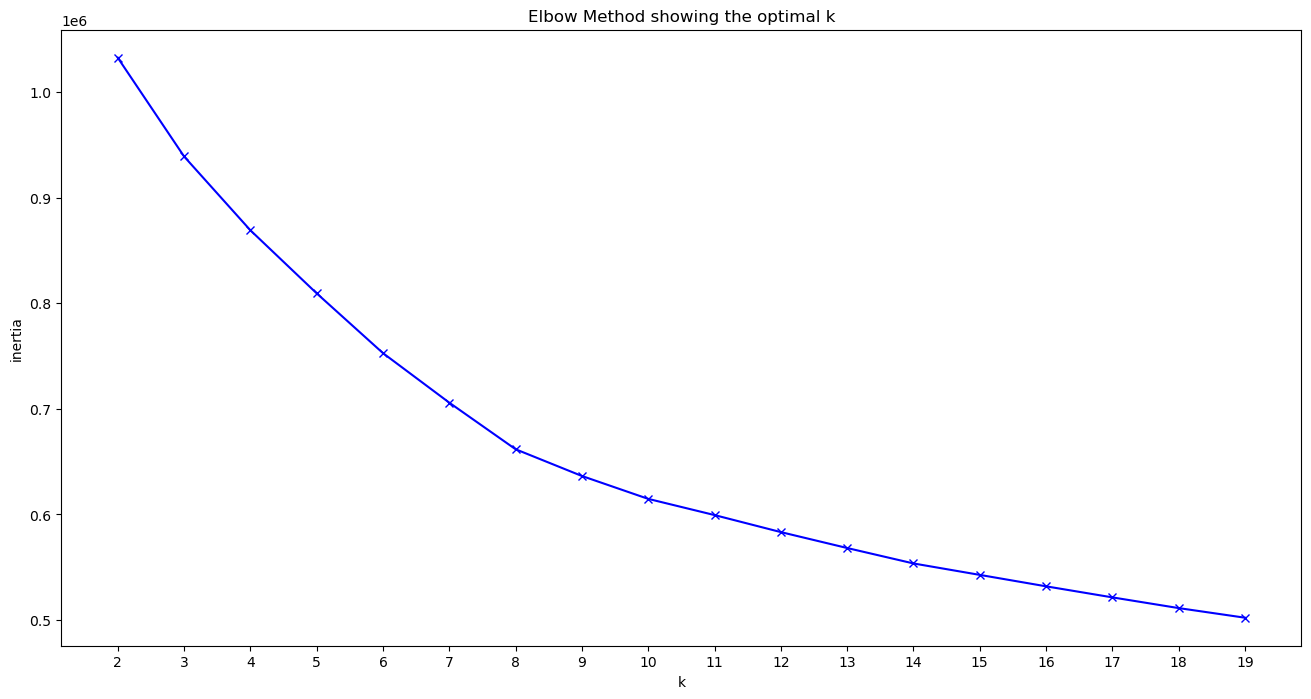

In [13]:
import numpy as np
K = range(2, 20)
inertia = []
for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=0)
    kmeans.fit(X_prep)
    inertia.append(kmeans.inertia_)
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

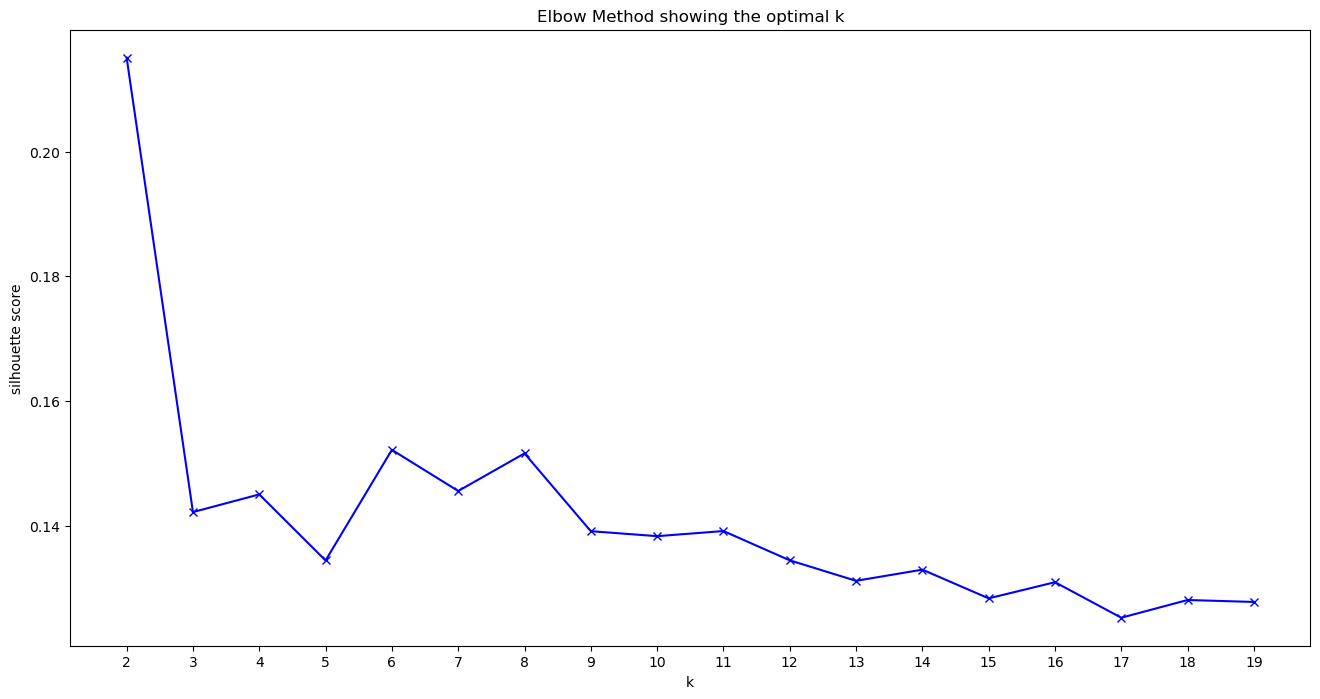

In [14]:
from sklearn.metrics import silhouette_score
K = range(2, 20)
silhouette = []
for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=0)
    kmeans.fit(X_prep)
    silhouette.append(silhouette_score(X_prep, kmeans.predict(X_prep)))
plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

In [15]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_prep)

KMeans(n_clusters=5, random_state=42)

In [16]:
kmeans.inertia_

806689.3039502697